In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (9, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [214]:
state = 'NY'
type_analysis = "cases" # "cases" or "deaths"
percentage = True

In [215]:
colors = {'regression_0':'tab:orange',
          'bayes_sir':'tab:green', 
          'sir_0':'tab:blue',
          'ihme': 'tab:red'}

# Open all models

### Predictions

In [216]:
predictions, shareindex, sharecolumns = {}, None, None
for model in ['regression_0', 'bayes_sir','sir_0', 'ihme']:
    predictions[model] = {pd.to_datetime(f[3:11]): pd.read_csv(os.path.join('results/', model,f), parse_dates = True, index_col = 'date') for f in  os.listdir(os.path.join('results/', model)) if state in f}
    predictions[model] = pd.DataFrame({d: predictions[model][d]['pred_{}'.format(type_analysis)] for d in sorted(predictions[model]) if 'pred_{}'.format(type_analysis) in predictions[model][d].columns})
    if predictions[model].empty:
        del predictions[model]
    elif shareindex is None:
        shareindex = predictions[model].index
        sharecolumns = predictions[model].columns
    else:
        shareindex = shareindex.intersection(predictions[model].index)
        sharecolumns = sharecolumns.intersection(predictions[model].columns)
print("Opened for {}: {}".format(type_analysis, ', '.join(predictions.keys())))

Opened for cases: regression_0, bayes_sir, sir_0


In [217]:
ground_truth = pd.read_csv('https://covidtracking.com/api/v1/states/daily.csv', parse_dates=['date'])[['date', 'state', 'positive', 'death']]
ground_truth = ground_truth[ground_truth.state == state]
ground_truth.index = ground_truth.date

if type_analysis == "cases":
    ground_truth = ground_truth.sort_index()['positive'].dropna()
elif type_analysis == "deaths":
    ground_truth = ground_truth.sort_index()['death'].dropna()
    
shareindex = shareindex.intersection(ground_truth.index)
ground_truth

date
2020-03-04         6.0
2020-03-05        22.0
2020-03-06        33.0
2020-03-07        76.0
2020-03-08       105.0
2020-03-09       142.0
2020-03-10       173.0
2020-03-11       216.0
2020-03-12       216.0
2020-03-13       421.0
2020-03-14       524.0
2020-03-15       729.0
2020-03-16       950.0
2020-03-17      1700.0
2020-03-18      2382.0
2020-03-19      4152.0
2020-03-20      7102.0
2020-03-21     10356.0
2020-03-22     15168.0
2020-03-23     20875.0
2020-03-24     25665.0
2020-03-25     30811.0
2020-03-26     37258.0
2020-03-27     44635.0
2020-03-28     52318.0
2020-03-29     59513.0
2020-03-30     66497.0
2020-03-31     75795.0
2020-04-01     83712.0
2020-04-02     92381.0
2020-04-03    102863.0
2020-04-04    113704.0
2020-04-05    122031.0
2020-04-06    130689.0
2020-04-07    138863.0
2020-04-08    149316.0
2020-04-09    159937.0
2020-04-10    170512.0
2020-04-11    180458.0
2020-04-12    188694.0
2020-04-13    195031.0
2020-04-14    202208.0
2020-04-15    213779.0
2020-0

Columns are the date used for training, index are the date at which it is evaluated

In [218]:
predictions['bayes_sir']

,2020-03-19,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06
date,,,,,,,,,,,,,
2020-03-20,6.375724e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-21,9.801969e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-22,1.506598e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-23,2.315139e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-24,3.556538e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-25,5.461351e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-26,8.381336e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-27,1.285102e+05,42725.999569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-28,1.967765e+05,47367.539270,50662.304048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
predictions['sir_0']

,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15
date,,,,,,,,,,,,,,,,,,,
2020-03-04,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
2020-03-05,14.736568,14.682935,14.648898,14.537860,14.500563,14.438808,14.346784,14.259749,14.234946,14.199555,14.166620,14.128359,14.062182,14.010682,13.958269,13.930300,13.925762,13.905094,13.902893
2020-03-06,27.456703,27.247475,27.115180,26.686254,26.543088,26.307060,25.957687,25.629841,25.536872,25.404570,25.281826,25.139669,24.894966,24.705538,24.513658,24.411635,24.395105,24.319912,24.311917
2020-03-07,45.974361,45.426718,45.081746,43.970442,43.601943,42.997134,42.108089,41.280612,41.047156,40.715854,40.409458,40.055722,39.449861,38.983399,38.513213,38.264153,38.223848,38.040783,38.021346
2020-03-08,72.926811,71.725234,70.971265,68.558406,67.763724,66.465445,64.570675,62.821943,62.331173,61.636706,60.996546,60.259861,59.004647,58.043644,57.079862,56.571316,56.489116,56.116372,56.076849
2020-03-09,112.145293,109.759947,108.269057,103.530027,101.979991,99.459677,95.808387,92.467610,91.535114,90.219467,89.010777,87.624395,85.274859,83.486345,81.701977,80.764180,80.612770,79.927381,79.854816
2020-03-10,169.189197,164.748826,161.984422,153.257294,150.422821,145.836332,139.241355,133.260430,131.600217,129.264907,127.126821,124.682510,120.563023,117.445518,114.351797,112.732441,112.471273,111.291254,111.166518
2020-03-11,252.112106,244.208494,239.307115,223.939616,218.983522,211.003314,199.615317,189.380104,186.554883,182.593031,178.978469,174.859849,167.958191,162.766206,157.641831,154.970618,154.540228,152.599570,152.394779
2020-03-12,372.552406,358.943686,350.535980,324.354000,315.969075,302.534402,283.508532,266.563028,261.911993,255.410041,249.499093,242.785814,231.602251,223.239435,215.031149,210.770217,210.084269,206.998113,206.673038


### Remove training data

In [220]:
for model in predictions:
    for c in predictions[model].columns:
        predictions[model].loc[predictions[model].index <= c, c] = np.nan    
    predictions[model] = predictions[model].loc[shareindex, sharecolumns].dropna(how='all')

In [221]:
predictions['bayes_sir']

,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06
date,,,,,,,,,,
2020-03-29,58489.541470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,63762.567681,65533.393356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-31,68099.526642,70633.621732,71659.106144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01,71571.881943,74822.194546,75728.243649,82429.503068,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-02,74304.051191,78189.369518,78868.977777,88386.874184,90123.354506,NaN,NaN,NaN,NaN,NaN
2020-04-03,76433.299799,80860.128790,81269.361284,93561.136416,95485.931845,99815.562820,NaN,NaN,NaN,NaN
2020-04-04,78086.774275,82963.722728,83100.156865,97977.557694,99878.249517,106447.698114,111370.910902,NaN,NaN,NaN
2020-04-05,79371.889394,84617.154986,84501.087962,101698.932184,103431.911951,112334.779936,119182.731341,123299.247408,NaN,NaN
2020-04-06,80374.673145,85918.752215,85580.220011,104807.047263,106288.969328,117479.882393,126228.918943,132542.381938,128489.761808,NaN


In [222]:
predictions['sir_0']

,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06
date,,,,,,,,,,
2020-03-29,56836.066583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,61613.321217,63465.675723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-31,65400.693328,68099.947155,69195.445942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01,68295.285853,71732.603331,73312.648356,77227.653979,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-02,70446.484255,74490.324852,76482.791024,82056.796035,82909.155387,NaN,NaN,NaN,NaN,NaN
2020-04-03,72012.295809,76533.543169,78859.728258,85844.647166,87227.421868,89402.167478,NaN,NaN,NaN,NaN
2020-04-04,73134.889243,78020.350290,80606.787788,88736.906687,90572.089271,93648.843895,97020.006095,NaN,NaN,NaN
2020-04-05,73931.031150,79088.177019,81872.226866,90900.465664,93104.668002,96938.043508,101756.026159,105303.862485,NaN,NaN
2020-04-06,74491.322994,79847.904118,82779.150528,92494.269482,94989.749830,99434.011029,105474.156090,110624.878609,111496.851848,NaN


In [223]:
predictions['regression_0']

,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06
date,,,,,,,,,,
2020-03-29,1.282178e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,1.831930e+05,1.627895e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-31,2.617392e+05,2.310669e+05,2.023645e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01,3.739630e+05,3.279809e+05,2.852065e+05,2.478746e+05,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-02,5.343039e+05,4.655425e+05,4.019614e+05,3.468212e+05,2.985926e+05,NaN,NaN,NaN,NaN,NaN
2020-04-03,7.633926e+05,6.607999e+05,5.665121e+05,4.852651e+05,4.146687e+05,3.546244e+05,NaN,NaN,NaN,NaN
2020-04-04,1.090705e+06,9.379517e+05,7.984245e+05,6.789728e+05,5.758685e+05,4.887690e+05,4.166274e+05,NaN,NaN,NaN
2020-04-05,1.558357e+06,1.331346e+06,1.125275e+06,9.500044e+05,7.997334e+05,6.736567e+05,5.699435e+05,4.845465e+05,NaN,NaN
2020-04-06,2.226519e+06,1.889737e+06,1.585927e+06,1.329226e+06,1.110624e+06,9.284820e+05,7.796787e+05,6.579835e+05,5.567055e+05,NaN


### Compute difference

In [224]:
for model in predictions:
    for c in predictions[model].columns:
        predictions[model][c] -= ground_truth[predictions[model].index]
        predictions[model][c] = predictions[model][c].abs()
        
        if percentage:
            predictions[model][c] /= ground_truth[predictions[model].index] 
            predictions[model][c] *= 100

In [225]:
predictions['bayes_sir']

,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06
date,,,,,,,,,,
2020-03-29,1.719723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,4.112114,1.449098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-31,10.153009,6.809655,5.456684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01,14.502243,10.619511,9.537171,1.532035,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-02,19.567821,15.362066,14.626408,4.323536,2.443842,NaN,NaN,NaN,NaN,NaN
2020-04-03,25.694079,21.390462,20.992620,9.042964,7.171741,2.962617,NaN,NaN,NaN,NaN
2020-04-04,31.324514,27.035353,26.915362,13.831037,12.159423,6.381747,2.051897,NaN,NaN,NaN
2020-04-05,34.957601,30.659296,30.754408,16.661396,15.241281,7.945702,2.334053,1.039283,NaN,NaN
2020-04-06,38.499282,34.257090,34.516126,19.804232,18.670302,10.107291,3.412744,1.418162,1.682803,NaN


In [226]:
predictions['sir_0']

,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06
date,,,,,,,,,,
2020-03-29,4.498065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,7.344209,4.558588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-31,13.713710,10.152454,8.707110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01,18.416373,14.310250,12.422773,7.746017,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-02,23.743536,19.366185,17.209393,11.175679,10.253022,NaN,NaN,NaN,NaN,NaN
2020-04-03,29.992032,25.596625,23.335185,16.544679,15.200391,13.086175,NaN,NaN,NaN,NaN
2020-04-04,35.679581,31.382933,29.108222,21.957973,20.343973,17.638039,14.673181,NaN,NaN,NaN
2020-04-05,39.416188,35.190093,32.908665,25.510349,23.704085,20.562772,16.614609,13.707285,NaN,NaN
2020-04-06,43.001077,38.902353,36.659435,29.225666,27.316186,23.915547,19.293777,15.352571,14.685358,NaN


### Relative dataframe

Computing with regard to the start date

In [227]:
predictions_relative = {}
for model in predictions:
    predictions_relative[model] = predictions[model].copy()
    for c in predictions[model].columns:
        predictions_relative[model][c] = predictions_relative[model][c].shift(-predictions_relative[model][c].isnull().sum())
    predictions_relative[model].index = np.arange(len(predictions_relative[model]))

In [228]:
predictions_relative['bayes_sir']

,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06
0,1.719723,1.449098,5.456684,1.532035,2.443842,2.962617,2.051897,1.039283,1.682803,1.160318
1,4.112114,6.809655,9.537171,4.323536,7.171741,6.381747,2.334053,1.418162,3.881732,4.453559
2,10.153009,10.619511,14.626408,9.042964,12.159423,7.945702,3.412744,1.758846,8.079948,8.045807
3,14.502243,15.362066,20.992620,13.831037,15.241281,10.107291,4.593363,0.123259,12.408300,NaN
4,19.567821,21.390462,26.915362,16.661396,18.670302,12.200264,7.600442,1.792704,NaN,NaN
5,25.694079,27.035353,30.754408,19.804232,21.806751,15.803005,10.761768,NaN,NaN,NaN
6,31.324514,30.659296,34.516126,22.665580,26.047500,19.377075,NaN,NaN,NaN,NaN
7,34.957601,34.257090,37.766984,26.646912,30.030989,NaN,NaN,NaN,NaN,NaN
8,38.499282,37.386086,41.683236,30.410604,NaN,NaN,NaN,NaN,NaN,NaN
9,41.552546,41.221672,45.230207,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [229]:
predictions_relative['sir_0']

,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06
0,4.498065,4.558588,8.707110,7.746017,10.253022,13.086175,14.673181,13.707285,14.685358,14.995400
1,7.344209,10.152454,12.422773,11.175679,15.200391,17.638039,16.614609,15.352571,16.332917,18.055131
2,13.713710,14.310250,17.209393,16.544679,20.343973,20.562772,19.293777,17.285408,19.719982,21.382336
3,18.416373,19.366185,23.335185,21.957973,23.704085,23.915547,21.984823,20.864128,23.266944,NaN
4,23.743536,25.596625,29.108222,25.510349,27.316186,27.051226,25.995878,24.534551,NaN,NaN
5,29.992032,31.382933,32.908665,29.225666,30.596993,31.235705,29.896974,NaN,NaN,NaN
6,35.679581,35.190093,36.659435,32.555712,34.780133,35.171632,NaN,NaN,NaN,NaN
7,39.416188,38.902353,39.923370,36.715559,38.655214,NaN,NaN,NaN,NaN,NaN
8,43.001077,42.112141,43.823471,40.541563,NaN,NaN,NaN,NaN,NaN,NaN
9,46.073827,45.911708,47.352934,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Prediction in x days

What is the error if the model tries to predict in x days ?

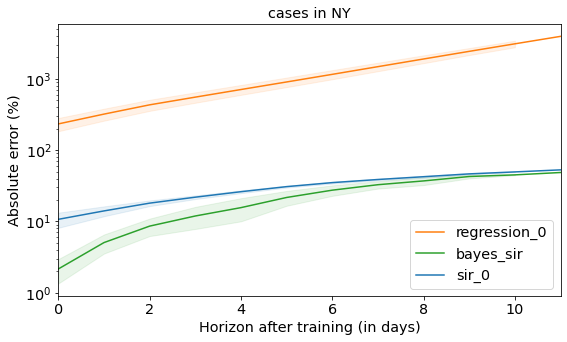

In [244]:
plt.title("{} in {}".format(type_analysis, state))
for model in predictions_relative:
    std = predictions_relative[model].std(axis = 1)
    mean = predictions_relative[model].mean(axis = 1)
    interval = 1.96 * std / np.sqrt(predictions_relative[model].notna().sum(axis = 1))
    ax = mean.plot(label = model, color = colors[model])
    plt.fill_between(mean.index, mean + interval, mean - interval, color = ax.get_lines()[-1].get_color(), alpha=.1)
plt.xlabel("Horizon after training (in days)")
plt.ylabel("Absolute error ({})".format("%" if percentage else "number cases"))
plt.yscale('log')
plt.legend()
plt.show()

/home/vincent/.local/lib/python3.7/site-packages/pandas/core/arrays/datetimelike.py:1219: FutureWarning: Addition/subtraction of integers and integer-arrays to DatetimeArray is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  maybe_integer_op_deprecated(self)
/home/vincent/.local/lib/python3.7/site-packages/pandas/core/arrays/datetimelike.py:1219: FutureWarning: Addition/subtraction of integers and integer-arrays to DatetimeArray is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  maybe_integer_op_deprecated(self)
/home/vincent/.local/lib/python3.7/site-packages/pandas/core/arrays/datetimelike.py:1219: FutureWarning: Addition/subtraction of integers and integer-arrays to DatetimeArray is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  maybe_integer_op_deprecated(self)


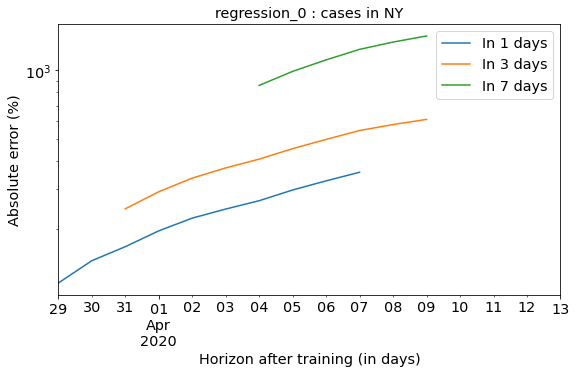

/home/vincent/.local/lib/python3.7/site-packages/pandas/core/arrays/datetimelike.py:1219: FutureWarning: Addition/subtraction of integers and integer-arrays to DatetimeArray is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  maybe_integer_op_deprecated(self)
/home/vincent/.local/lib/python3.7/site-packages/pandas/core/arrays/datetimelike.py:1219: FutureWarning: Addition/subtraction of integers and integer-arrays to DatetimeArray is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  maybe_integer_op_deprecated(self)
/home/vincent/.local/lib/python3.7/site-packages/pandas/core/arrays/datetimelike.py:1219: FutureWarning: Addition/subtraction of integers and integer-arrays to DatetimeArray is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  maybe_integer_op_deprecated(self)


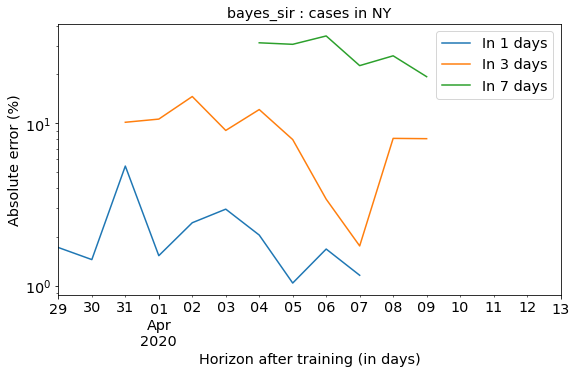

/home/vincent/.local/lib/python3.7/site-packages/pandas/core/arrays/datetimelike.py:1219: FutureWarning: Addition/subtraction of integers and integer-arrays to DatetimeArray is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  maybe_integer_op_deprecated(self)
/home/vincent/.local/lib/python3.7/site-packages/pandas/core/arrays/datetimelike.py:1219: FutureWarning: Addition/subtraction of integers and integer-arrays to DatetimeArray is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  maybe_integer_op_deprecated(self)
/home/vincent/.local/lib/python3.7/site-packages/pandas/core/arrays/datetimelike.py:1219: FutureWarning: Addition/subtraction of integers and integer-arrays to DatetimeArray is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  maybe_integer_op_deprecated(self)


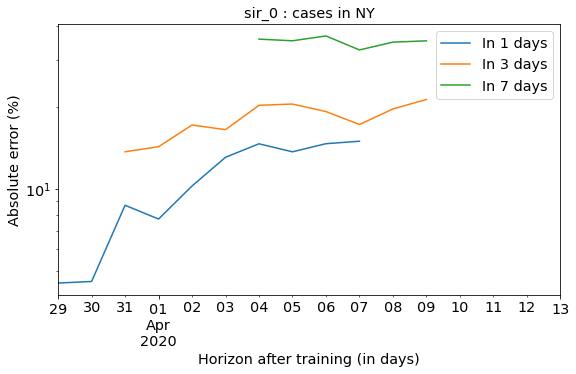

In [246]:
for model in predictions_relative:
    plt.title("{} : {} in {}".format(model, type_analysis, state))
    for i in [1, 3, 7]:
        data = predictions_relative[model].loc[i - 1].copy()
        data.index += i
        data.plot(label = 'In {} days'.format(i))
    plt.xlabel("Horizon after training (in days)")
    plt.ylabel("Absolute error ({})".format("%" if percentage else "number cases"))
    plt.yscale('log')
    plt.legend()
    plt.show()

# Prediction for x days 

What is the average error for the following x days ?

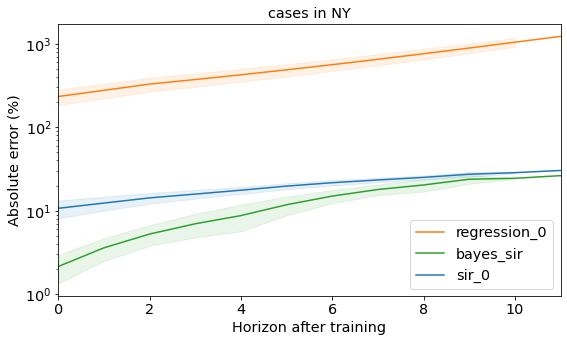

In [247]:
plt.title("{} in {}".format(type_analysis, state))
for model in predictions_relative:
    mean_matrix = predictions_relative[model].rolling(len(predictions_relative[model]), min_periods=1).mean()
    mean_matrix[predictions_relative[model].isnull()] = np.nan
    std = mean_matrix.std(axis = 1)
    mean = mean_matrix.mean(axis = 1)
    interval = 1.96 * std / np.sqrt(mean_matrix.notna().sum(axis = 1))
    
    ax = mean.plot(label = model, color = colors[model])
    plt.fill_between(mean.index, mean + interval, mean - interval, color = ax.get_lines()[-1].get_color(), alpha=.1)
plt.xlabel("Horizon after training")
plt.ylabel("Absolute error ({})".format("%" if percentage else "number cases"))
plt.yscale('log')
plt.legend()
plt.show()

# Prediction for given date

What is the predictions that my model does for a given date ? Large variance indicates that the model changed 

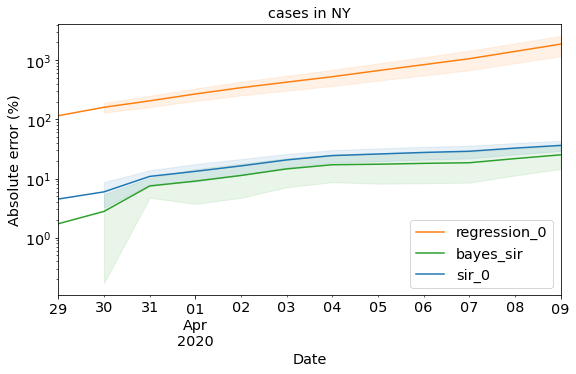

In [248]:
plt.title("{} in {}".format(type_analysis, state))
for model in predictions:
    std = predictions[model].std(axis = 1)
    mean = predictions[model].mean(axis = 1)
    interval = 1.96 * std / np.sqrt(predictions[model].notna().sum(axis = 1))
    
    ax = mean.plot(label = model, color = colors[model])
    plt.fill_between(mean.index, mean + interval, mean - interval, color = ax.get_lines()[-1].get_color(), alpha=.1)
    
plt.xlabel("Date")
plt.ylabel("Absolute error ({})".format("%" if percentage else "number cases"))
plt.yscale('log')
plt.legend()
plt.show()

# Prediction until given date

What is the average error until a given date ?

/home/vincent/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app


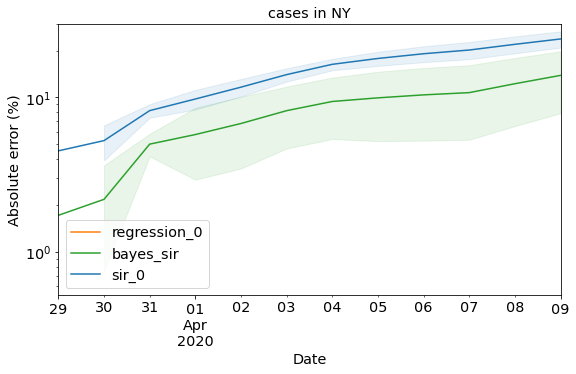

In [249]:
plt.title("{} in {}".format(type_analysis, state))
for model in predictions:
    mean_matrix = predictions[model].rolling(len(predictions[model]), min_periods=1).mean()
    mean_matrix[predictions[model].isnull()] = np.nan
    std = mean_matrix.std(axis = 1)
    mean = mean_matrix.mean(axis = 1)
    interval = 1.96 * std / np.sqrt(mean_matrix.notna().sum(axis = 1))
    
    ax = mean.plot(label = model, color = colors[model])
    plt.fill_between(mean.index, mean + interval, mean - interval, color = ax.get_lines()[-1].get_color(), alpha=.1)
plt.xlabel("Date")
plt.ylabel("Absolute error ({})".format("%" if percentage else "number cases"))
plt.yscale('log')
if percentage:
    plt.ylim(-0.1, 30)
plt.legend()
plt.show()

# Parameters

In [250]:
params = {}
for model in ['bayes_sir', 'sir_0', 'sir_100']:
    print(model)
    params[model] = {pd.to_datetime(f[8:-4]): pd.read_csv(os.path.join('params/', model,f), index_col = 'Parameter')['Value'] for f in os.listdir(os.path.join('params/', model)) if state in f}
    params[model] = pd.DataFrame({d: params[model][d] for d in sorted(params[model])}).T

bayes_sir
sir_0
sir_100


### Gamma

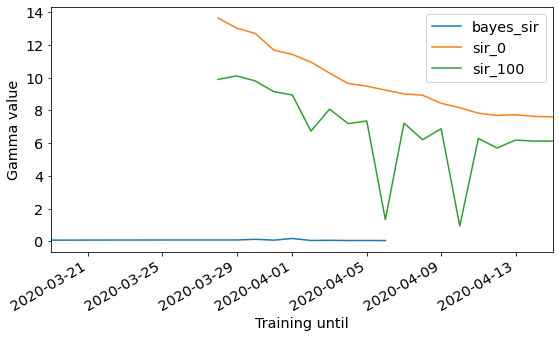

In [251]:
for model in params:
    params[model].gamma.plot(label = model)
plt.xlabel("Training until")
plt.ylabel("Gamma value")
plt.legend()
plt.show()

### Mortality

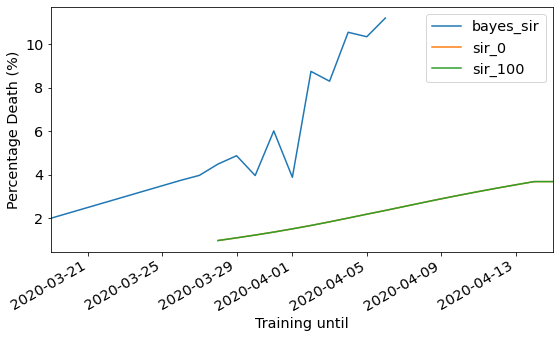

In [238]:
for model in params:
    (params[model].DeathProportion * 100).plot(label = model)
plt.xlabel("Training until")
plt.ylabel("Percentage Death (%)")
plt.legend()
plt.show()